Alice Friedman, Stephen Jones, Jeffrey Littlejohn, Jun Pan


Assignment Detail:
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description.   [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.
Python code to create dataset:https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an IPython notebook stored in your GitHub repository.

You may work in a small group on this project.

In [19]:
# Import modules
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
from scipy import stats
from pylab import rcParams
import math
%matplotlib inline

Data and Graphs
The Davis Southern Club Women data set was collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women.  The dataset available here - http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat. This data set is also included with the NetworkX package. The data set here is included in NetworkX package and it comes as a bipartite graph (clubs, women).

In [8]:
G = nx.davis_southern_women_graph()

In [3]:
type(G)

networkx.classes.graph.Graph

In [13]:
# Distance Metric
print('center =', nx.center(G))
print('diameter =', nx.diameter(G))
print('radius =', nx.radius(G))

center = ['Evelyn Jefferson', 'Theresa Anderson', 'Ruth DeSand', 'Verne Sanderson', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'E6', 'E7', 'E8', 'E9']
diameter = 4
radius = 3


In [4]:
G.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

In [5]:
G.edges()

EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), ('Theresa Anderson', 'E7'), ('Theresa Anderson', 'E8'), ('Theresa Anderson', 'E9'), ('Brenda Rogers', 'E1'), ('Brenda Rogers', 'E3'), ('Brenda Rogers', 'E4'), ('Brenda Rogers', 'E5'), ('Brenda Rogers', 'E6'), ('Brenda Rogers', 'E7'), ('Brenda Rogers', 'E8'), ('Charlotte McDowd', 'E3'), ('Charlotte McDowd', 'E4'), ('Charlotte McDowd', 'E5'), ('Charlotte McDowd', 'E7'), ('Frances Anderson', 'E3'), ('Frances Anderson', 'E5'), ('F

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 89\nAverage degree:   5.5625'

In [7]:
len(G.nodes())

32

In [8]:
len(G.edges)

89

In [9]:
G.nodes(data=True)

NodeDataView({'Evelyn Jefferson': {'bipartite': 0}, 'Laura Mandeville': {'bipartite': 0}, 'Theresa Anderson': {'bipartite': 0}, 'Brenda Rogers': {'bipartite': 0}, 'Charlotte McDowd': {'bipartite': 0}, 'Frances Anderson': {'bipartite': 0}, 'Eleanor Nye': {'bipartite': 0}, 'Pearl Oglethorpe': {'bipartite': 0}, 'Ruth DeSand': {'bipartite': 0}, 'Verne Sanderson': {'bipartite': 0}, 'Myra Liddel': {'bipartite': 0}, 'Katherina Rogers': {'bipartite': 0}, 'Sylvia Avondale': {'bipartite': 0}, 'Nora Fayette': {'bipartite': 0}, 'Helen Lloyd': {'bipartite': 0}, 'Dorothy Murchison': {'bipartite': 0}, 'Olivia Carleton': {'bipartite': 0}, 'Flora Price': {'bipartite': 0}, 'E1': {'bipartite': 1}, 'E2': {'bipartite': 1}, 'E3': {'bipartite': 1}, 'E4': {'bipartite': 1}, 'E5': {'bipartite': 1}, 'E6': {'bipartite': 1}, 'E7': {'bipartite': 1}, 'E8': {'bipartite': 1}, 'E9': {'bipartite': 1}, 'E10': {'bipartite': 1}, 'E11': {'bipartite': 1}, 'E12': {'bipartite': 1}, 'E13': {'bipartite': 1}, 'E14': {'bipartite':

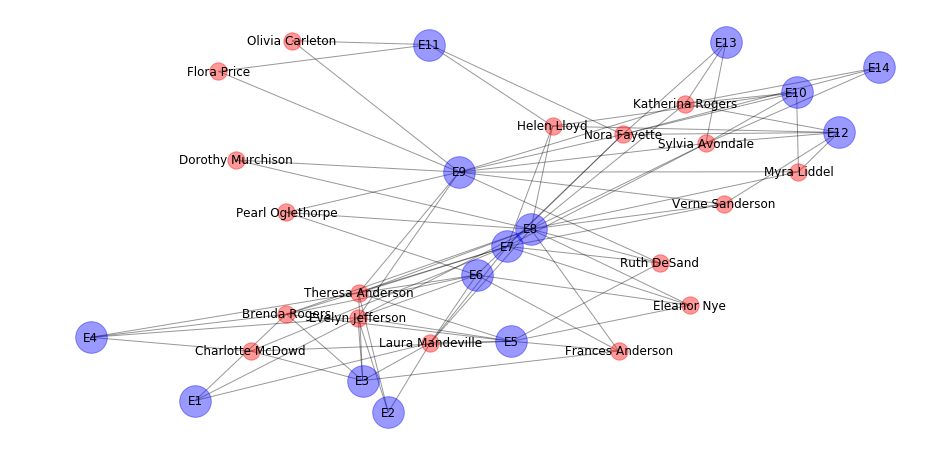

In [10]:
# Visualize the 2-mode networks
women, events = nx.bipartite.sets(G)
plt.rcParams["figure.figsize"] = (16,8)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='red', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='blue', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

The fourteen events and the eighteen women have various connections. Among the events, the seventh, eighth, and ninth events had the most participants.  Among Women, Evelynn Jefferson, Theresa Anderson, and Nora Fayette attended the most events.

In [12]:
import nxviz as nv

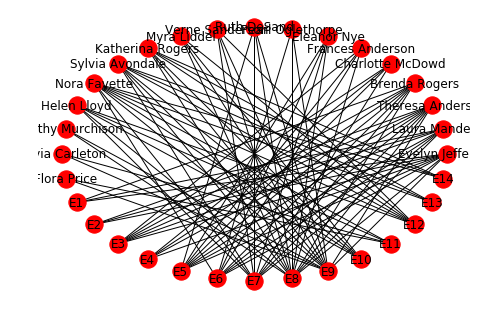

In [9]:
nx.draw_circular(G, labels=None)
plt.show()

In [11]:
list(G.degree())

[('Evelyn Jefferson', 8),
 ('Laura Mandeville', 7),
 ('Theresa Anderson', 8),
 ('Brenda Rogers', 7),
 ('Charlotte McDowd', 4),
 ('Frances Anderson', 4),
 ('Eleanor Nye', 4),
 ('Pearl Oglethorpe', 3),
 ('Ruth DeSand', 4),
 ('Verne Sanderson', 4),
 ('Myra Liddel', 4),
 ('Katherina Rogers', 6),
 ('Sylvia Avondale', 7),
 ('Nora Fayette', 8),
 ('Helen Lloyd', 5),
 ('Dorothy Murchison', 2),
 ('Olivia Carleton', 2),
 ('Flora Price', 2),
 ('E1', 3),
 ('E2', 3),
 ('E3', 6),
 ('E4', 4),
 ('E5', 8),
 ('E6', 8),
 ('E7', 10),
 ('E8', 14),
 ('E9', 12),
 ('E10', 5),
 ('E11', 4),
 ('E12', 6),
 ('E13', 3),
 ('E14', 3)]

In [12]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))


#Friends, Member
17 Evelyn Jefferson
16 Myra Liddel
16 Pearl Oglethorpe
12 Olivia Carleton
17 Nora Fayette
15 Frances Anderson
17 Ruth DeSand
17 Theresa Anderson
17 Sylvia Avondale
16 Katherina Rogers
16 Dorothy Murchison
12 Flora Price
11 Charlotte McDowd
15 Brenda Rogers
15 Eleanor Nye
15 Laura Mandeville
17 Helen Lloyd
17 Verne Sanderson


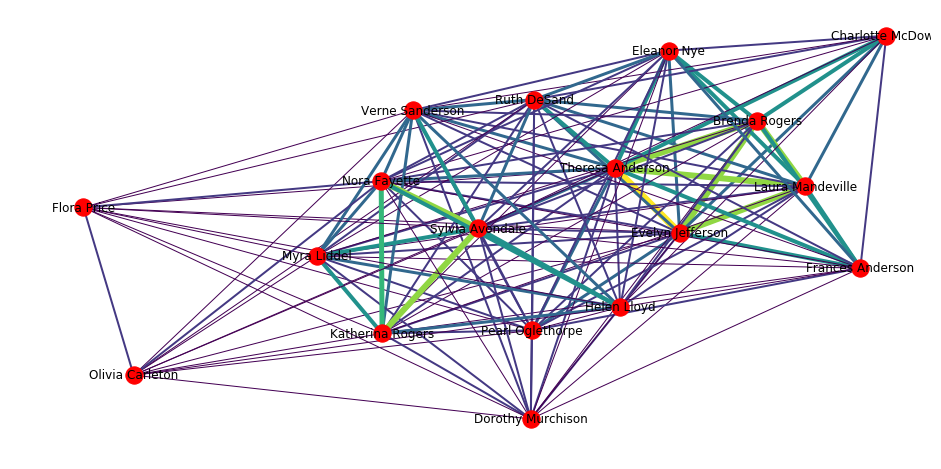

In [22]:
# Above data shows the number of friends each woman has.  The following shows the detialed relation ship amoung this group.
women = G.graph['top']
W = bipartite.weighted_projected_graph(G, women,ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(W, k=0.1,iterations=20, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

In [23]:
# Summary statics for women network
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


In [24]:
#Find Women Cliques
list(nx.find_cliques(W))

[['Evelyn Jefferson',
  'Nora Fayette',
  'Verne Sanderson',
  'Ruth DeSand',
  'Theresa Anderson',
  'Helen Lloyd',
  'Sylvia Avondale',
  'Charlotte McDowd',
  'Brenda Rogers',
  'Eleanor Nye',
  'Laura Mandeville',
  'Frances Anderson'],
 ['Evelyn Jefferson',
  'Nora Fayette',
  'Verne Sanderson',
  'Ruth DeSand',
  'Theresa Anderson',
  'Helen Lloyd',
  'Sylvia Avondale',
  'Myra Liddel',
  'Pearl Oglethorpe',
  'Dorothy Murchison',
  'Katherina Rogers',
  'Flora Price',
  'Olivia Carleton'],
 ['Evelyn Jefferson',
  'Nora Fayette',
  'Verne Sanderson',
  'Ruth DeSand',
  'Theresa Anderson',
  'Helen Lloyd',
  'Sylvia Avondale',
  'Myra Liddel',
  'Pearl Oglethorpe',
  'Dorothy Murchison',
  'Katherina Rogers',
  'Frances Anderson',
  'Brenda Rogers',
  'Eleanor Nye',
  'Laura Mandeville']]

In [ ]:
Relationships Between the Social Events¶

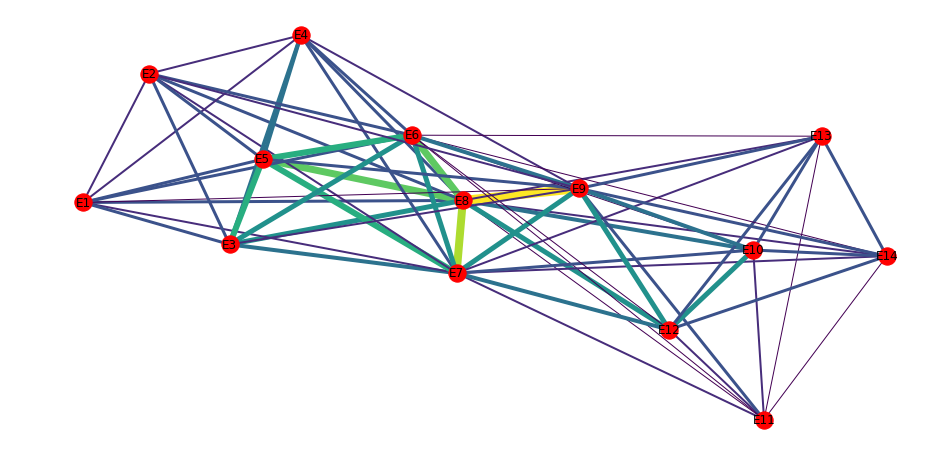

In [25]:
eventss = G.graph['bottom']
E = bipartite.weighted_projected_graph(G, events,ratio=False)
weights = [edata['weight'] for f,t,edata in E.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(E, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

In [26]:
#Summary of statistics for Events
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


In [28]:
# Events degree centrality (number of women attend the events)
d_E = E.degree(E)
pd.DataFrame(d_E, columns=["Social Events", "Degree"])

,Social Events,Degree
0,E8,13
1,E11,8
2,E7,13
3,E1,8
4,E4,8
5,E5,8
6,E12,8
7,E14,8
8,E10,8
9,E6,13
